# Whaca Demo Notebook
## Basic Usage

In [1]:
from scripts.whaca import whaca

In [26]:
w = whaca(db_thresh=5.6, width_thresh=200,time_thresh=0.2,NFFT = 512)

In [27]:
# w.open_wav("smallneg.wav")
# w.open_url("https://sweet.tunes.org/")
w.open_wav("smallpos.wav")

In [28]:
%%time
import numpy as np
spec,freq,time = w.gen_spectro(process=True)

Wall time: 151 ms


In [29]:
spec = w.filter_sounds(spec, time[1] - time[0])

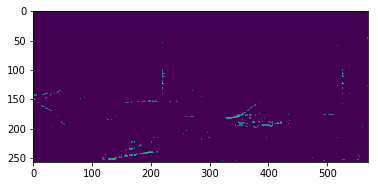

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(spec,interpolation="nearest")
plt.show()

## Demo w/ Widgets

In [12]:
from ipywidgets import IntSlider, FloatSlider ,Text, interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def make_spectrogram(db_t, time_t, width_t, NF, file):
    # set parameters
    w = whaca()
    w.open_wav(file)
    w.set_threshold_params(db_thresh=db_t, time_thresh=time_t, width_thresh=width_t)
    w.set_spectro_params(NFFT = 2 ** NF)
    # process
    spec,freq,time = w.gen_spectro(process=True)
    # detect sounds    
    spec = w.filter_sounds(spec, time[1] - time[0])
    # return plot
    plt.imshow(spec,interpolation="nearest")
    plt.colorbar()

In [15]:
l = widgets.Layout(width="75%")
s = {"description_width" : "initial"}


# this block looks ugly so the output looks pretty
interact(make_spectrogram, 
                db_t=FloatSlider(value=3, min=0, max=15, step=0.2, description="Call Intensity Threshold",layout=l,style=s), 
                time_t=FloatSlider(value=0.2,min=0,max=1.0,step=0.02,description="Call Duration Threshold",layout=l,style=s), 
                width_t=IntSlider(value=200,min=0,max=1000,step=50,description="Broadband Bandwidth Threshold",layout=l,style=s), 
                NF=fixed(9),
                file=Text(value="smallpos.wav", placeholder="Type here!", description="File to analyze:",layout=l,style=s))

interactive(children=(FloatSlider(value=3.0, description='Call Intensity Threshold', layout=Layout(width='75%'…

<function __main__.make_spectrogram(db_t, time_t, width_t, NF, file)>

In [128]:
spec,freq,time = w.gen_spectro(process=True)

In [105]:
new = adjacent_filter(spec)

C:\Users\ganzk\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
C:\Users\ganzk\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


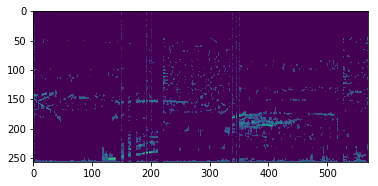

In [106]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(new,interpolation="nearest")
plt.show()

In [126]:
import operator
from functools import reduce

def group_consecutives(vals, step=1):
    '''Returns 2d list containing all consecutive subsets of array based off of given step size.'''
    run = []
    result = [run]
    expect = None
    for v in vals:
        if v == expect or expect is None:
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result

def adjacent_filter(spec):
    new = spec.copy()
    prev = []
    for col in range(0,np.ma.size(spec,axis=1)):
        if prev == []:
            prev = np.where(spec[:,col] > db_thresh)[0]
        else:
            groups = [g for g in group_consecutives(np.where(spec[:,col] > db_thresh)[0]) if not set(prev).isdisjoint(g)]
            if groups == []:
                prev = np.where(spec[:,col] > db_thresh)[0]
            else:
                silence = set(range(0,np.ma.size(spec,axis=0))) - set(reduce(operator.add, groups))
                print(groups)
                new[list(silence),col] = 0
    return new

In [118]:
arr = np.random.rand(4,4)

In [119]:
arr

array([[0.72357265, 0.36703126, 0.22259651, 0.71307499],
       [0.85958813, 0.44058284, 0.66023023, 0.20376732],
       [0.35903321, 0.68745291, 0.12723656, 0.31475913],
       [0.87152454, 0.61662252, 0.877482  , 0.17068946]])

In [127]:
db_thresh = 0.5

new = adjacent_filter(arr)

[[2, 3]]
[[1], [3]]
[[0]]


C:\Users\ganzk\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [121]:
new

array([[0.72357265, 0.        , 0.        , 0.71307499],
       [0.85958813, 0.        , 0.66023023, 0.        ],
       [0.35903321, 0.68745291, 0.        , 0.        ],
       [0.87152454, 0.61662252, 0.877482  , 0.        ]])